<a href="https://colab.research.google.com/github/JeremiasSchultz/Clusteriza-o-e-Regress-o/blob/main/Assig7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bibliotecas

In [65]:
# ---- Bibliotecas gerais
import pandas as pd #dataframes
import numpy as np #arrays
import matplotlib.pyplot as plt #graficos
import seaborn as sns #graficos 2
import datetime as dt
from google.colab import files 
from google.colab import drive

# ---- Pré-processamento
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

# ---- Possíveis Modelos utilizados
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import  LogisticRegression

# ---- Cálculo das Métricas
from sklearn import metrics

# ***Tirar Warning***
import warnings
warnings.filterwarnings('ignore')

#Drive e datasets

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
#Transforma exponencial em valor decimal
pd.set_option('float_format', '{:2f}'.format) 

#QualidadeMatPrima
df = pd.read_csv('/content/drive/MyDrive/Datasets/Assig7/CC GENERAL.csv', header=0)


##1. Analise dos dados

#### 1.1 head

In [68]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.400000,0.000000,95.400000,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.000000,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.000000,0.000000,0.000000,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.000000,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.170000,773.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.000000,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.000000,1499.000000,0.000000,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.000000,0.000000,nan,0.000000,12
4,C10005,817.714335,1.000000,16.000000,16.000000,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.000000,678.334763,244.791237,0.000000,12


#### 1.2 Dtype

In [69]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

#### 1.3 info

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

#### 1.4 discribe

In [71]:
df.describe(percentiles=[0.001,.01,.1,.25,.5,.75,.9,.99,.999])

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
0.1%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,294.800000,0.000000,1.253614,0.000000,6.000000
1%,0.065101,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000,19.524478,0.000000,6.000000
10%,23.575529,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1200.000000,179.617069,106.034864,0.000000,10.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000


#### 1.5 Valores nulos? is na

In [72]:
df.isna()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8946,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
8947,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8948,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [73]:
pd.DataFrame(df.isna().sum(axis=0)).sort_values(by=0, ascending=False)/df.shape[0]*100

,0
MINIMUM_PAYMENTS,3.497207
CREDIT_LIMIT,0.011173
CUST_ID,0.000000
BALANCE,0.000000
PRC_FULL_PAYMENT,0.000000
PAYMENTS,0.000000
PURCHASES_TRX,0.000000
CASH_ADVANCE_TRX,0.000000
CASH_ADVANCE_FREQUENCY,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0.000000


#### 1.6 Valores nulos? is null

In [74]:
df.isnull()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8946,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
8947,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8948,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [75]:
pd.DataFrame(df.isnull().sum(axis=0)).sort_values(by=0, ascending=False)/df.shape[0]*100

,0
MINIMUM_PAYMENTS,3.497207
CREDIT_LIMIT,0.011173
CUST_ID,0.000000
BALANCE,0.000000
PRC_FULL_PAYMENT,0.000000
PAYMENTS,0.000000
PURCHASES_TRX,0.000000
CASH_ADVANCE_TRX,0.000000
CASH_ADVANCE_FREQUENCY,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0.000000


In [76]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.400000,0.000000,95.400000,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.000000,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.000000,0.000000,0.000000,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.000000,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.170000,773.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.000000,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.000000,1499.000000,0.000000,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.000000,0.000000,nan,0.000000,12
4,C10005,817.714335,1.000000,16.000000,16.000000,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.000000,678.334763,244.791237,0.000000,12


In [77]:
df.shape

(8950, 18)

In [78]:
df = df.dropna(axis='columns',how='all')

In [79]:
df.duplicated().sum()

0

###1.6 Shape

In [80]:
df.shape

(8950, 18)

##2. Análise grafica dos dados

###2.1 numericas

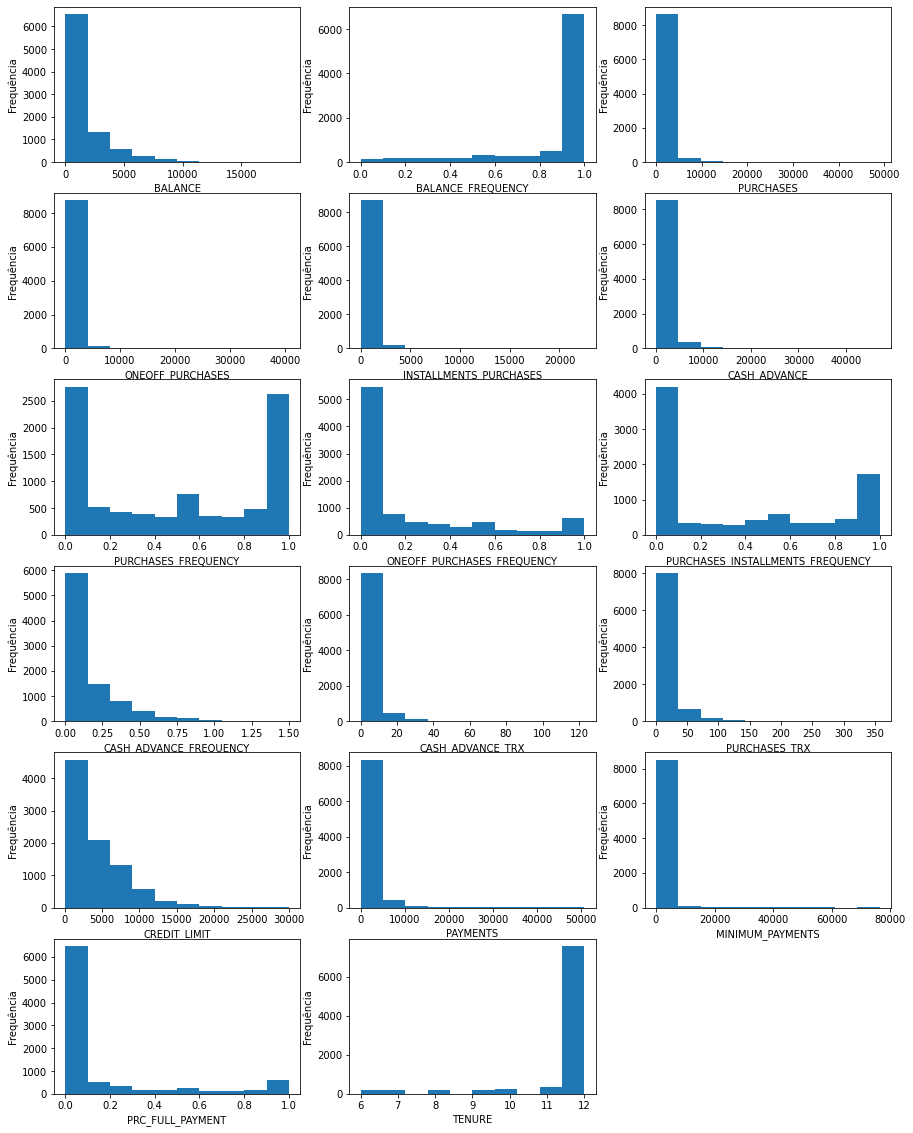

In [81]:
contColNames = list(df.select_dtypes(include='number').columns)
ncols = 3
nrows = int(np.ceil(len(contColNames)/(1.0 * ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,20))
counter = 0 
for i in range(nrows):
  for j in range(ncols):
    ax = axes[i][j]
    # Plotar somente quando houver dados
    if counter < len(contColNames):
      ax.hist(df.select_dtypes(include='number')[contColNames[counter]], bins=10)
      ax.set_xlabel(contColNames[counter])
      ax.set_ylabel('Frequência')
    else:
      ax.set_axis_off()
    counter += 1
plt.show()

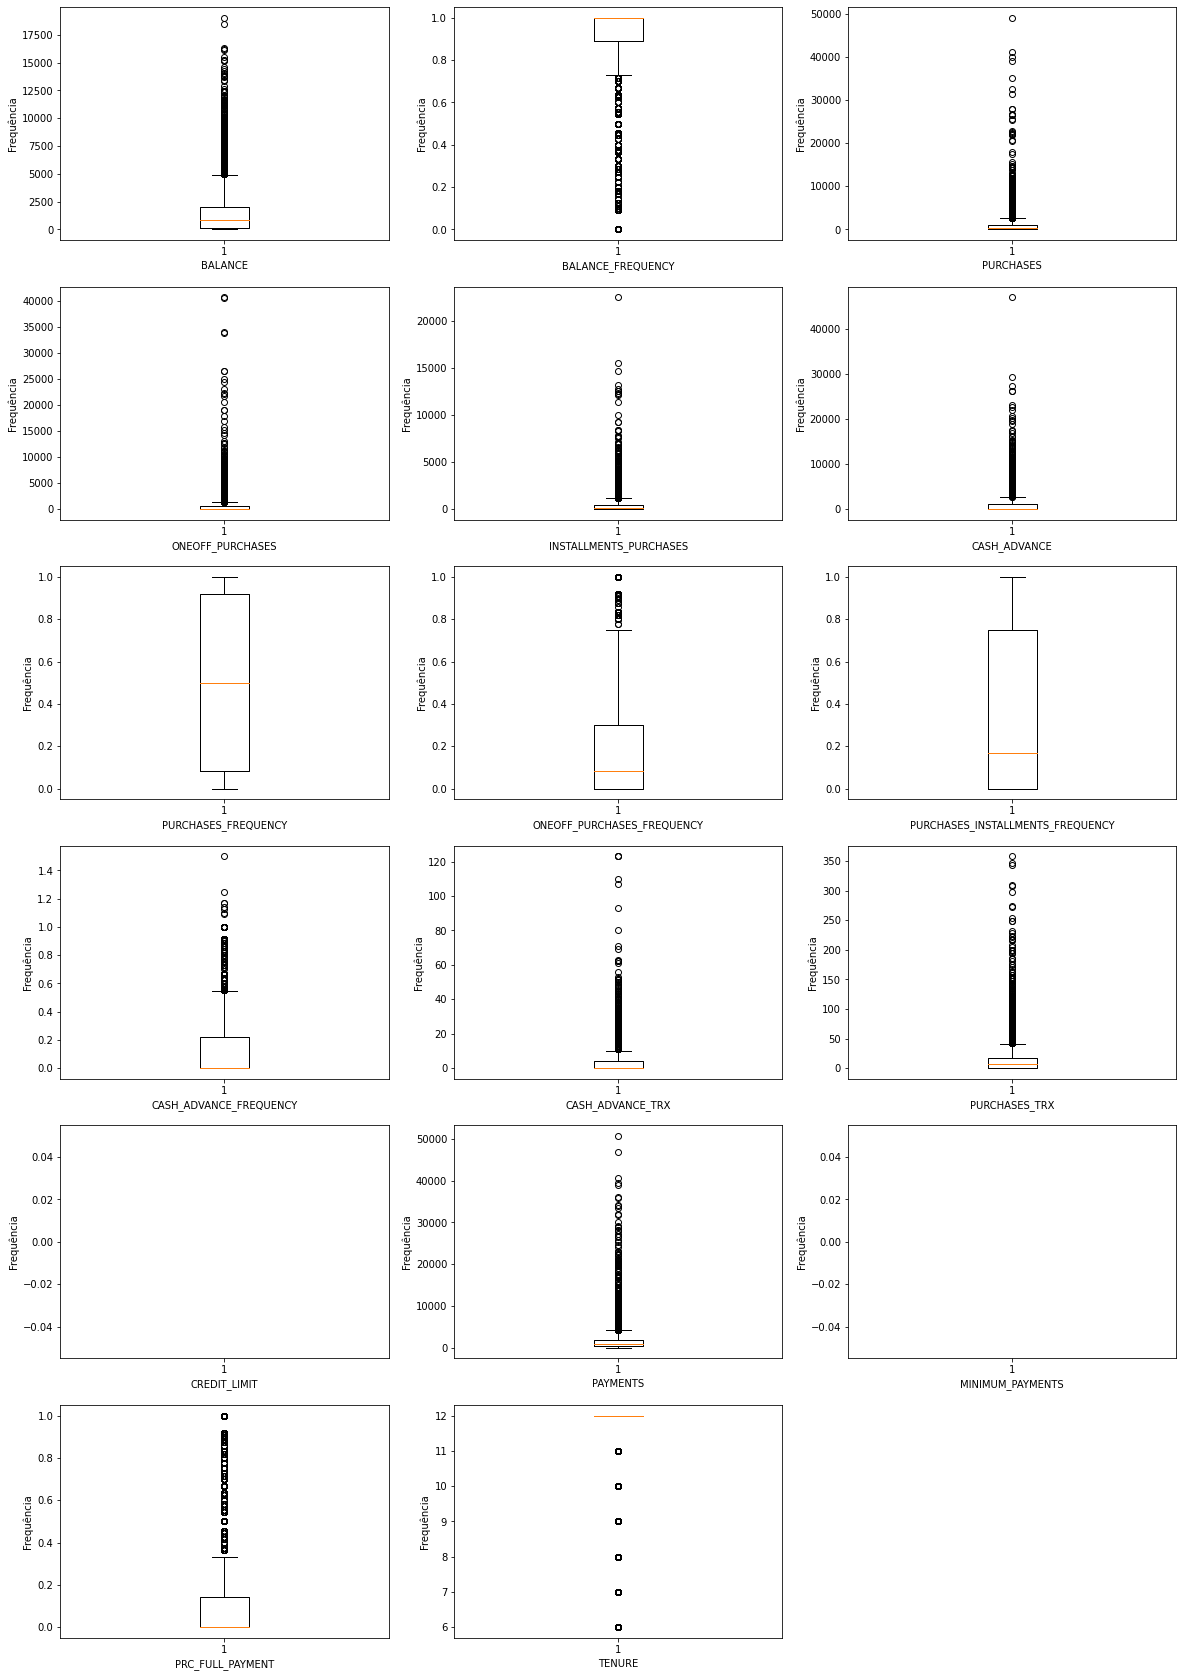

In [82]:
contColNames = list(df.select_dtypes(include='number').columns)
ncols = 3
nrows = int(np.ceil(len(contColNames)/(1.0 * ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,30))
counter = 0 
for i in range(nrows):
  for j in range(ncols):
    ax = axes[i][j]
    # Plotar somente quando houver dados
    if counter < len(contColNames):
      ax.boxplot(df.select_dtypes(include='number')[contColNames[counter]])
      ax.set_xlabel(contColNames[counter])
      ax.set_ylabel('Frequência')
    else:
      ax.set_axis_off()
    counter += 1
plt.show()

###2.2 variaveis categóricas

In [83]:
print((df['CUST_ID'].value_counts(dropna=False)/df.shape[0])*100,'\n')


C13265   0.011173
C12332   0.011173
C10552   0.011173
C10914   0.011173
C11409   0.011173
           ...   
C14525   0.011173
C16302   0.011173
C12013   0.011173
C11199   0.011173
C18737   0.011173
Name: CUST_ID, Length: 8950, dtype: float64 



##3. Correlação

In [84]:
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


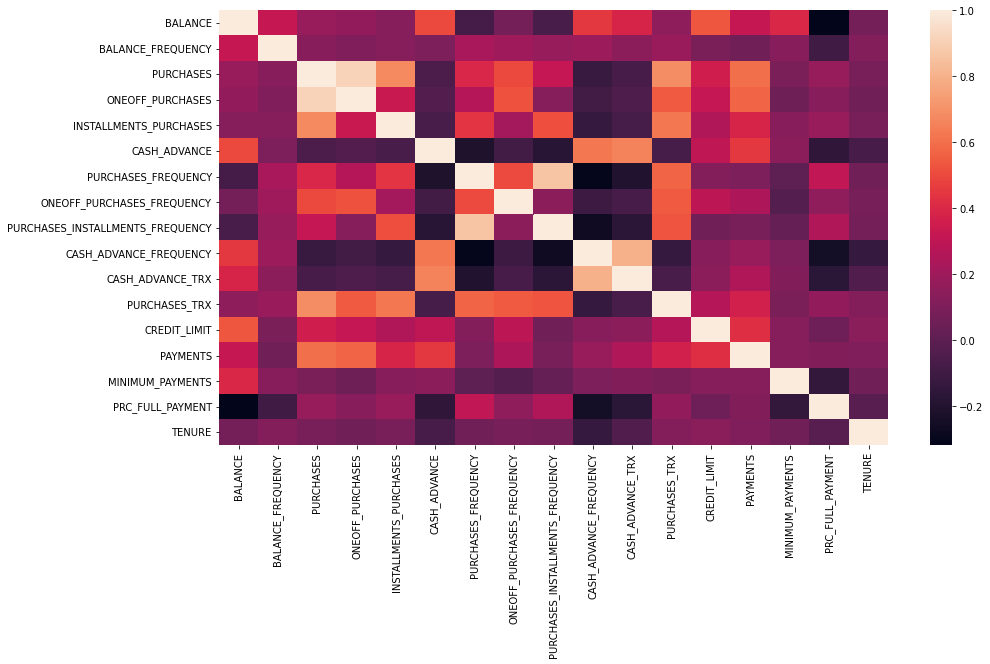

In [85]:
fig, ax = plt.subplots(figsize=(15,8))  
sns.heatmap(df.corr())

##4. LIMPEZA DOS DADOS


###4.1 CUST_ID

In [86]:
df = df.drop('CUST_ID', axis=1)

###4.2 Outliers

In [87]:
q_hi  = df["BALANCE"].quantile(0.95)
df = df[(df["BALANCE"] <= q_hi)]

In [88]:
q_hi  = df["PURCHASES"].quantile(0.95)
df = df[(df["PURCHASES"] <= q_hi)]

In [89]:
q_hi  = df["MINIMUM_PAYMENTS"].quantile(0.95)
df = df[(df["MINIMUM_PAYMENTS"] <= q_hi)]

In [90]:
q_hi  = df["PAYMENTS"].quantile(0.95)
df = df[(df["PAYMENTS"] <= q_hi)]

In [91]:
q_hi  = df["PURCHASES_TRX"].quantile(0.95)
df = df[(df["PURCHASES_TRX"] <= q_hi)]

In [92]:
q_hi  = df["ONEOFF_PURCHASES"].quantile(0.95)
df = df[(df["ONEOFF_PURCHASES"] <= q_hi)]

In [93]:
q_hi  = df["CASH_ADVANCE"].quantile(0.95)
df = df[(df["CASH_ADVANCE"] <= q_hi)]

In [94]:
q_hi  = df["CASH_ADVANCE_TRX"].quantile(0.95)
df = df[(df["CASH_ADVANCE_TRX"] <= q_hi)]

In [95]:
df.shape

(5743, 17)

##Analise Pos limpeza

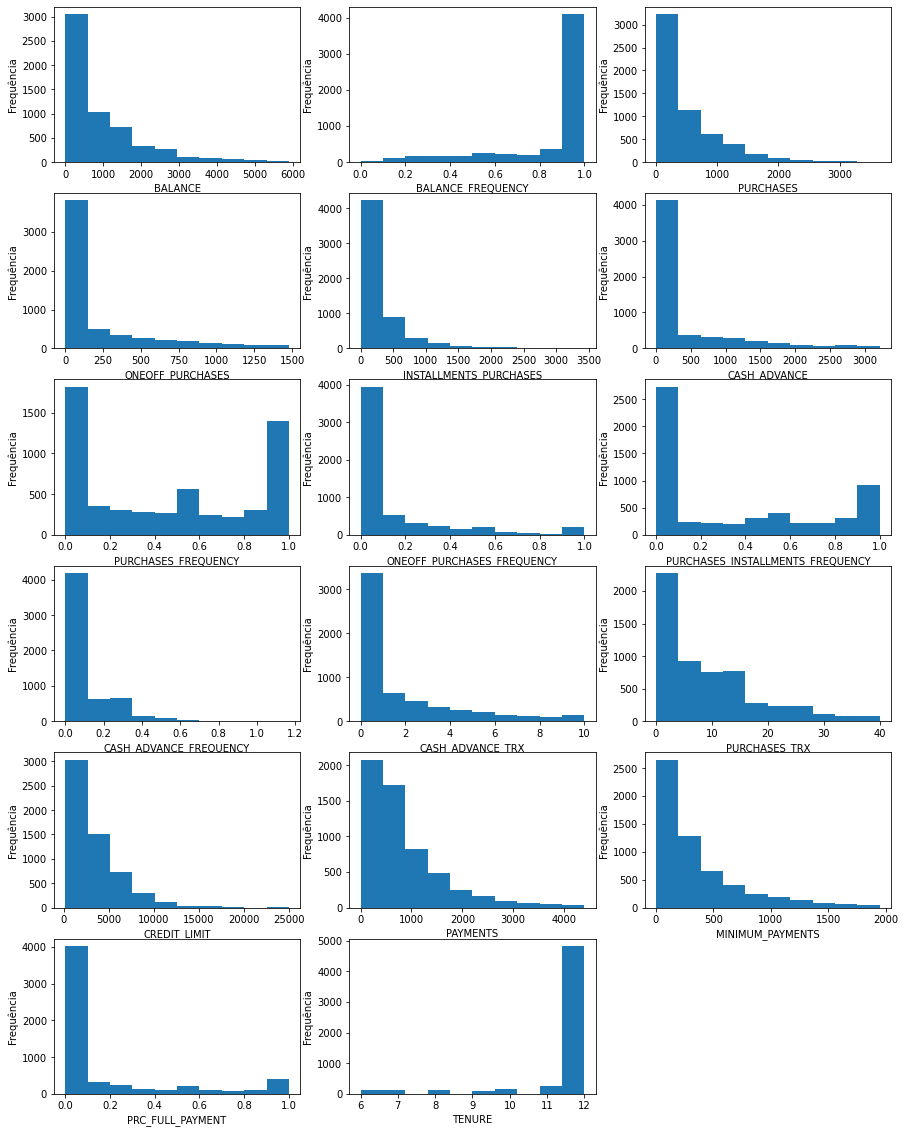

In [96]:
contColNames = list(df.select_dtypes(include='number').columns)
ncols = 3
nrows = int(np.ceil(len(contColNames)/(1.0 * ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,20))
counter = 0 
for i in range(nrows):
  for j in range(ncols):
    ax = axes[i][j]
    # Plotar somente quando houver dados
    if counter < len(contColNames):
      ax.hist(df.select_dtypes(include='number')[contColNames[counter]], bins=10)
      ax.set_xlabel(contColNames[counter])
      ax.set_ylabel('Frequência')
    else:
      ax.set_axis_off()
    counter += 1
plt.show()

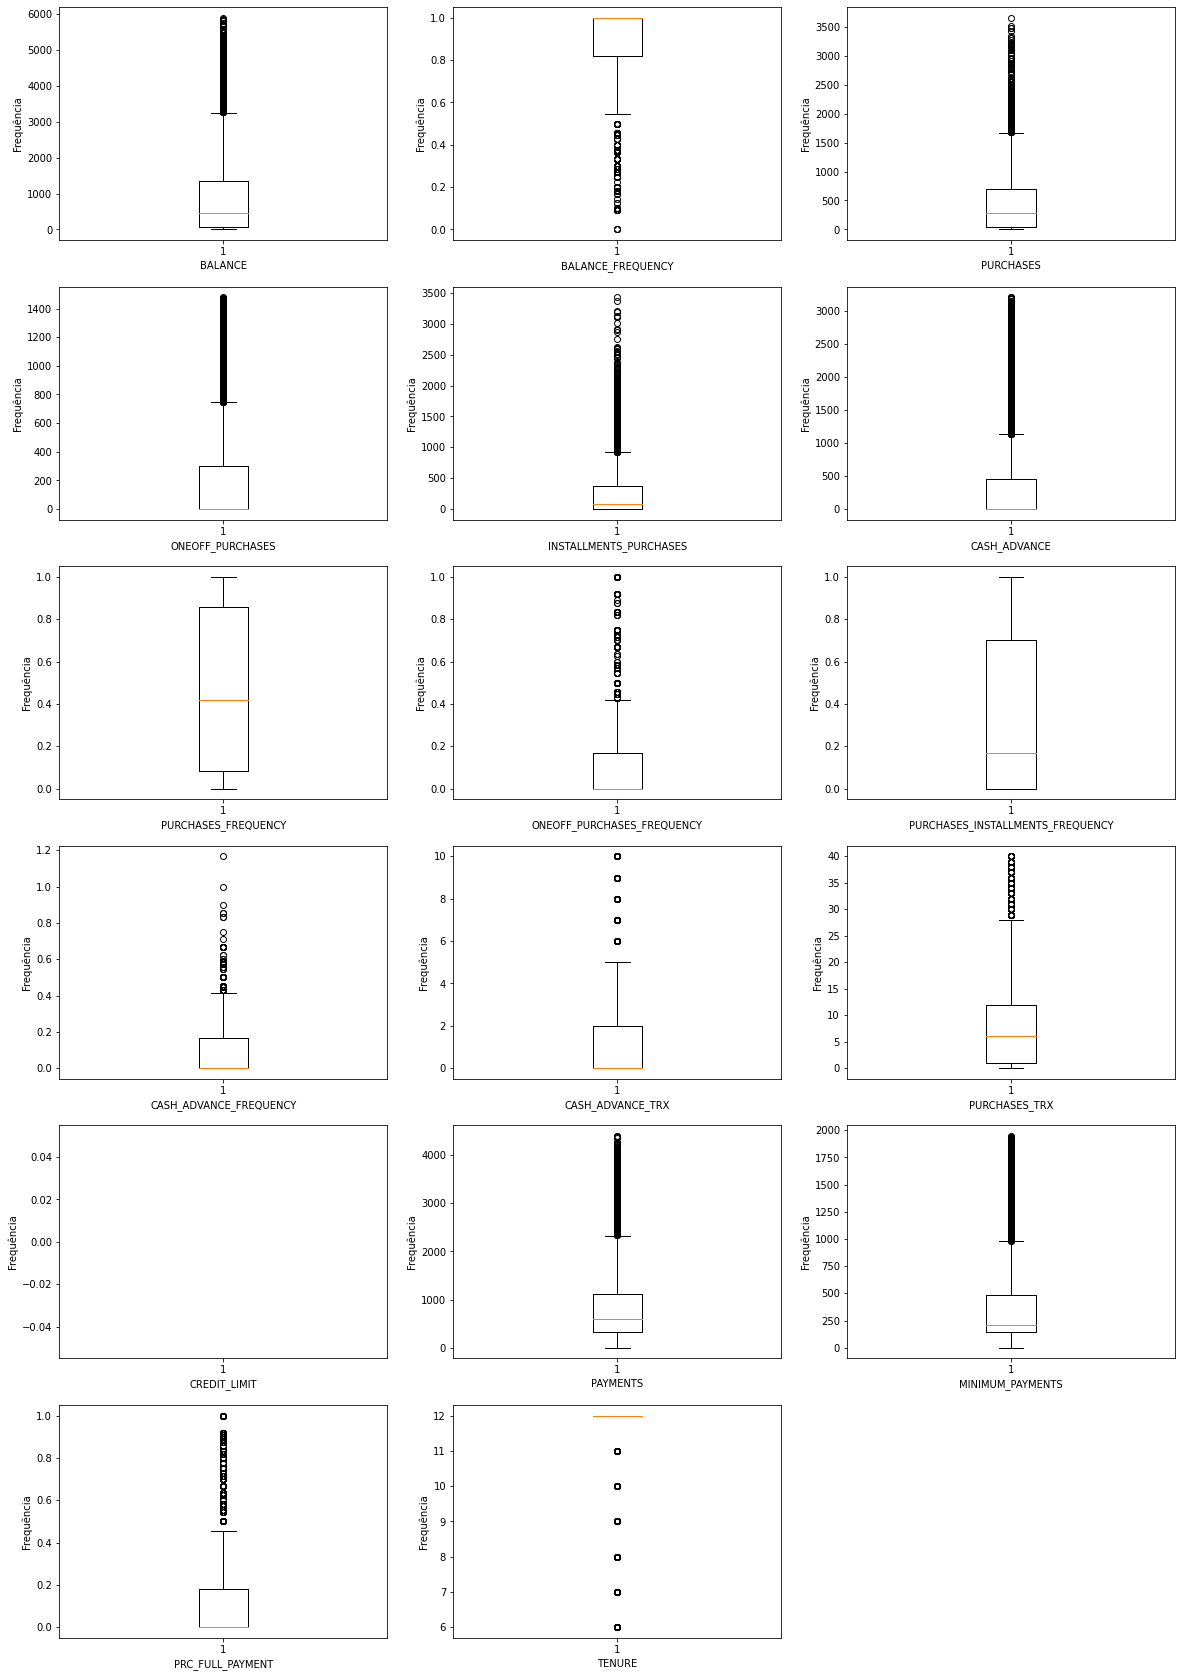

In [97]:
contColNames = list(df.select_dtypes(include='number').columns)
ncols = 3
nrows = int(np.ceil(len(contColNames)/(1.0 * ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,30))
counter = 0 
for i in range(nrows):
  for j in range(ncols):
    ax = axes[i][j]
    # Plotar somente quando houver dados
    if counter < len(contColNames):
      ax.boxplot(df.select_dtypes(include='number')[contColNames[counter]])
      ax.set_xlabel(contColNames[counter])
      ax.set_ylabel('Frequência')
    else:
      ax.set_axis_off()
    counter += 1
plt.show()

In [98]:
df.describe(percentiles=[0.001,.01,.1,.25,.5,.75,.9,.99,.999])

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,5743.000000,5743.000000,5743.000000,5743.000000,5743.000000,5743.000000,5743.000000,5743.000000,5743.000000,5743.000000,5743.000000,5743.000000,5742.000000,5743.000000,5743.000000,5743.000000,5743.000000
mean,898.017793,0.868028,472.053411,212.351153,260.027298,382.837874,0.460680,0.141308,0.343656,0.085797,1.452899,8.427129,3476.745661,850.279527,375.480287,0.165603,11.485635
std,1095.913493,0.230174,556.140335,348.543833,419.265876,688.941503,0.386838,0.239453,0.382164,0.133639,2.358685,8.911317,2846.968161,763.515834,367.852176,0.300046,1.384253
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.056466,0.019163,0.000000,6.000000
0.1%,0.001196,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000,11.937268,0.317534,0.000000,6.000000
1%,1.700415,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,50.696160,16.124128,0.000000,6.000000
10%,18.296145,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,178.203837,86.682964,0.000000,10.000000
25%,66.229905,0.818182,41.300000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,319.221207,147.400261,0.000000,12.000000
50%,470.915050,1.000000,285.240000,0.000000,77.360000,0.000000,0.416667,0.000000,0.166667,0.000000,0.000000,6.000000,2500.000000,601.430928,210.770458,0.000000,12.000000
75%,1343.182650,1.000000,694.400000,299.575000,367.305000,457.230084,0.857143,0.166667,0.700000,0.166667,2.000000,12.000000,4500.000000,1123.744598,481.716850,0.181818,12.000000
